# TERILS MOSDAC RADAR
- @author: syed44@purdue.edu
- @date: Nov 1, 2022
---

### Note
The issue with the data is that it doesn't have sweep start ray index and sweep end ray index. We will try to add these things manually. Also it has issues with timestamp as well. We will try to take care of that as well. Remember to make a backup of the original data, as I will try to rewrite it.

In [2]:
import xarray as xr
import pyart
import numpy as np
import pyscancf as pcf
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter, FuncFormatter
import pandas as pd
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import glob

In [3]:
files = sorted(glob.glob("RCT*.nc"))
len(files)

2

In [4]:
for file in files:
#     print(file.split("_")[1:3])
    time_str = pd.to_datetime(file.split("_")[1:3][0]+" "+file.split("_")[1:3][1])
#     print(time_str)
    radar = pyart.io.read(file)
    radar.time['units'] = "seconds since "+time_str.to_datetime64().astype(str)[:-7]
    radar.sweep_start_ray_index['data'] = np.arange(0,
                                                radar.azimuth['data'].size,
                                                radar.azimuth['data'].size//radar.sweep_number['data'].size)

    radar.sweep_end_ray_index['data'] = np.arange(radar.azimuth['data'].size//radar.sweep_number['data'].size-1,
              radar.azimuth['data'].size,
              radar.azimuth['data'].size//radar.sweep_number['data'].size)
    pyart.io.write_cfradial(file, radar)

### Watch carefully:
We have rewrote the data with the timestamps and ray indices, now we can normally use these files in any package e.g., wradlib, pyart etc.

In [5]:
radar = pyart.io.read("RCTLS_12OCT2022_103335_L2B_STD.nc")

In [6]:
display = pyart.graph.RadarDisplay(radar)

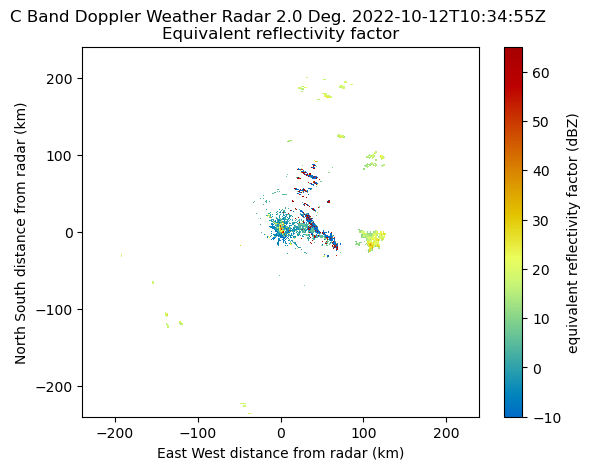

In [7]:
display.plot("DBZ", 2)

In [8]:
import pyscancf as pcf
grid = pcf.get_grid(radar, grid_shape=(30, 400, 400), height=12, length=200)

In [9]:
xgrid = grid.to_xarray()

In [10]:
grid.fields['REF'] = grid.fields['DBZ']

Generating Figures of Max-CAPPI, please be patient!
Figures saved


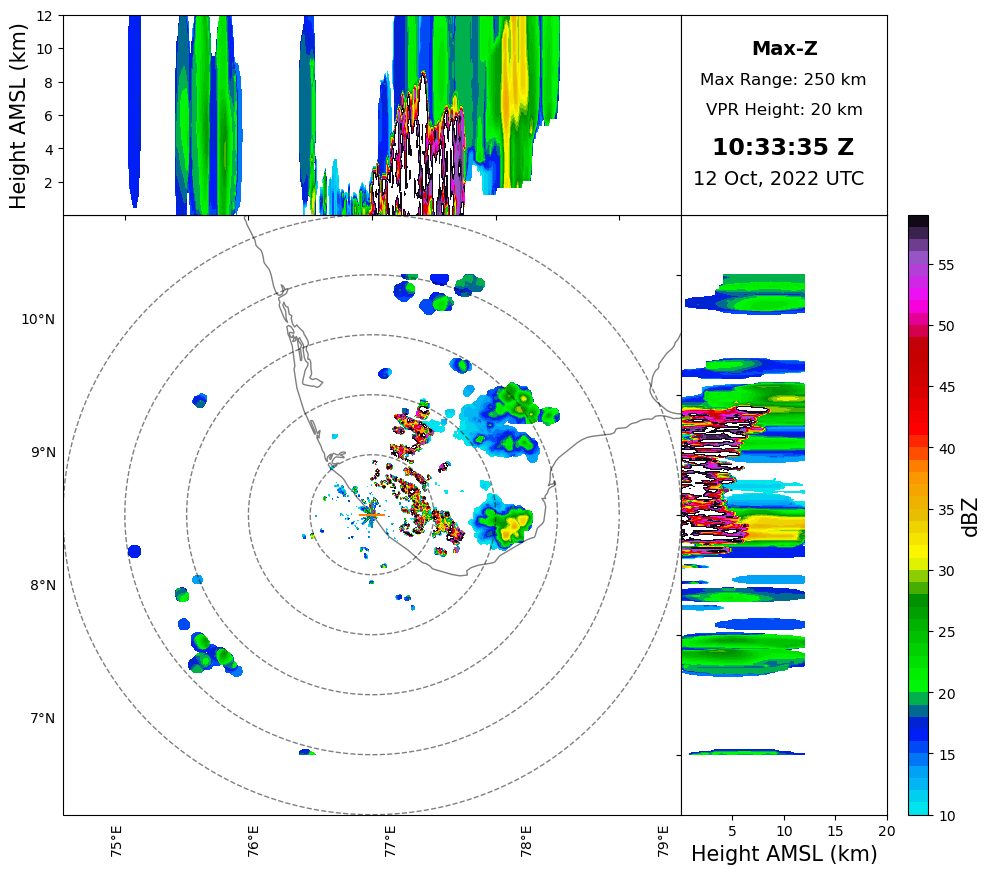

In [11]:
pcf.plot_cappi(grid, "REF")

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

Text(0, 0.5, '')

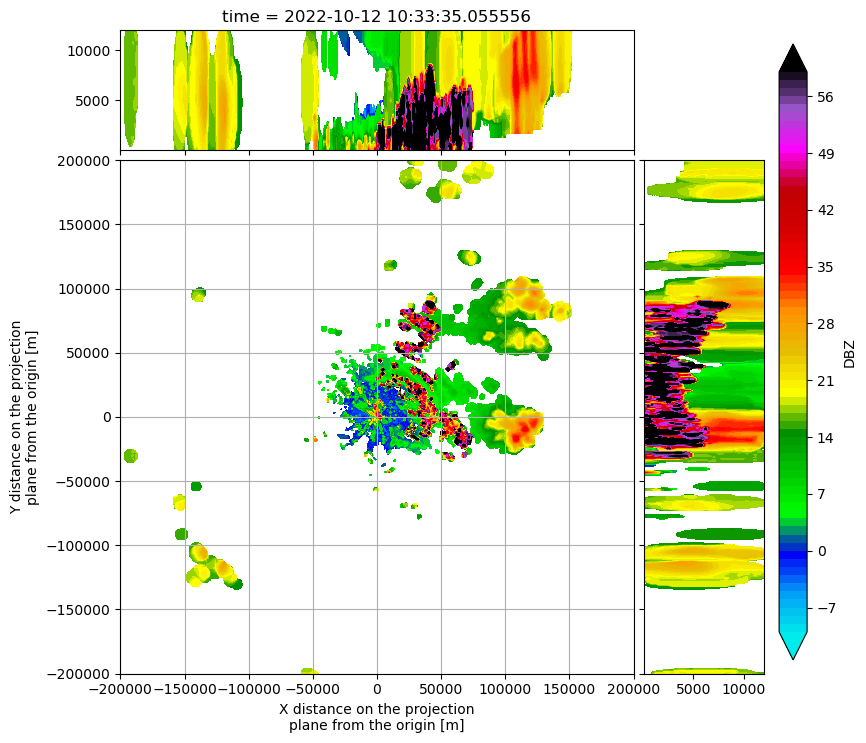

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect(1.)
xgrid['DBZ'][0].max(axis=0).plot.contourf(cmap='pyart_NWSRef',
                                          levels=range(-10,60),
                                          cbar_kwargs={'pad':0.02,
                                                       'shrink':0.8},
                                          ax=ax)
ax.grid()
ax.set_title(None)
# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_x = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_y = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)
# make some labels invisible
ax_x.xaxis.set_tick_params(labelbottom=False)
ax_y.yaxis.set_tick_params(labelleft=False)
xgrid['DBZ'][0].max(axis=1).plot.contourf(cmap='pyart_NWSRef',levels=range(-10,60),add_colorbar=False,ax=ax_x)
xgrid['DBZ'][0].max(axis=2).T.plot.contourf(cmap='pyart_NWSRef',levels=range(-10,60),
                                         add_colorbar=False,add_title=None,ax=ax_y,)
ax_y.set_title(None)
ax_y.set_xlabel(None);ax_y.set_ylabel(None);ax_x.set_xlabel(None);ax_x.set_ylabel(None)

or you can plot at any height (CAPPI)

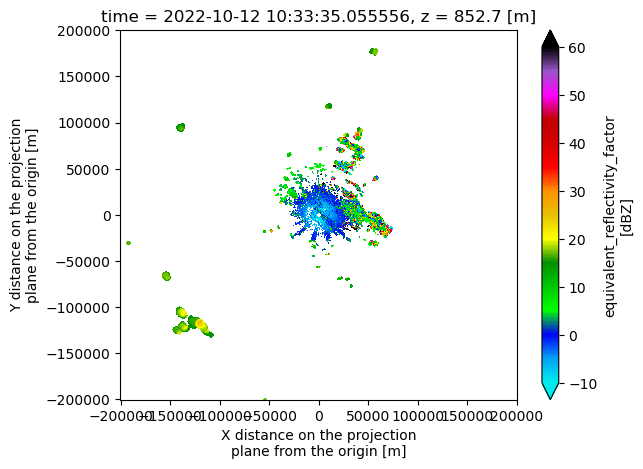

In [14]:
xgrid.DBZ[0].sel(z = 1000, method = "nearest").plot(vmin=-10, vmax = 60, cmap = "pyart_NWSRef") # 1000 is 1km there

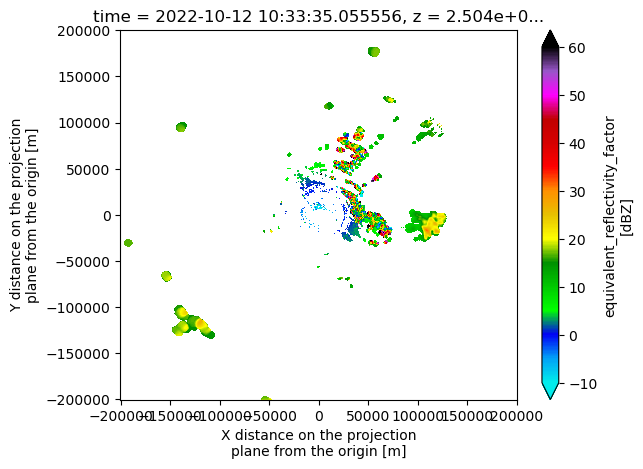

In [15]:
xgrid.DBZ[0].sel(z = 2500, method = "nearest").plot(vmin=-10, vmax = 60, cmap = "pyart_NWSRef") # 1000 is 1km there